In [5]:
import torch
from torch import nn, optim
import torch.nn.functional as F

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

from torchvision import datasets, transforms

import helper

In [6]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(784, 512)
        self.layer2 = nn.Linear(512, 256)
        self.layer3 = nn.Linear(256, 128)
        self.layer4 = nn.Linear(128, 64)
        self.layer5 = nn.Linear(64, 10)
        # Dropout module with 0.2 drop probability
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        # make tensor is flattened
        x = x.view(x.shape[0], -1)

        # Now with dropout
        x = self.dropout(F.relu(self.layer1(x)))
        x = self.dropout(F.relu(self.layer2(x)))
        x = self.dropout(F.relu(self.layer3(x)))
        x = self.dropout(F.relu(self.layer4(x)))

        # output so no dropout here
        x = F.log_softmax(self.layer5(x), dim=1)

        return x


In [7]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5),)
])

train_set = datasets.mnist.FashionMNIST('~/.pytorch/F_MNIST_data/',
                                        download=True,
                                        train=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)

test_set = datasets.mnist.FashionMNIST('~/.pytorch/F_MNIST_data/',
                                        download=True,
                                        train=True, transform=transform)
test_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)

In [14]:
model = Network()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(),lr = 0.003)

epoch = 5
steps = 0

train_loss,test_loss = [],[]

for e in range(epoch):
    running_loss = 0
    for images,labels in train_loader:
        # make gradient zero
        optimizer.zero_grad()
        log_ps = model(images)
        loss = criterion(log_ps,labels)
        #back propagation
        loss.backward()
        optimizer.step()
        # update running loss
        running_loss += loss
    
    else:
        testing_loss = 0
        accuracy = 0
        
         # work with no gradient to spreed up the process
        with torch.no_grad():
        
            model.eval()
            
            for images,labels in test_loader:
                test_ps = model(images)
                t_loss = criterion(test_ps,labels)
                # update running loss
                testing_loss += loss
                
                #probability
                ps = torch.exp(test_ps)
                # get the top class
                top_p,top_class = ps.topk(1, dim=1)
                equals = top_class = labels.view(*top_class.shape)
                # calculate the mean
                mean = torch.mean(equals.type(torch.FloatTensor))
                #update accuracy
                accuracy += mean
        
        # back to train
        model.train()
        
        #clculate train loss and running loss
        train_loss.append(running_loss/len(train_loader))
        test_loss.append(testing_loss/len(test_loader))
        
        # print the whats going on
        print("Epoch: {}/{}..   ".format(e+1,epoch),
             "Train_loss: {:.3f}...  ".format(train_loss[-1]),
             "Test_loss: {:.3f}...  ".format(test_loss[-1]),
             "Accuracy: {:.3f}".format(accuracy/len(test_loader)))

Epoch: 1/5..    Train_loss: 0.643...   Test_loss: 0.592...   Accuracy: 4.499
Epoch: 2/5..    Train_loss: 0.507...   Test_loss: 0.629...   Accuracy: 4.500
Epoch: 3/5..    Train_loss: 0.470...   Test_loss: 0.424...   Accuracy: 4.500
Epoch: 4/5..    Train_loss: 0.458...   Test_loss: 0.422...   Accuracy: 4.500
Epoch: 5/5..    Train_loss: 0.445...   Test_loss: 0.504...   Accuracy: 4.500


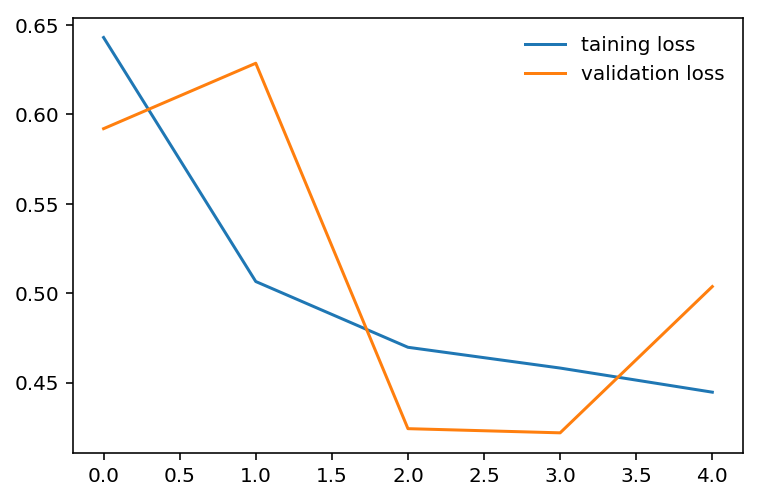

In [17]:
# check for overfitting
plt.plot(train_loss, label = "taining loss")
plt.plot(test_loss, label = "validation loss")
plt.legend(frameon = False)

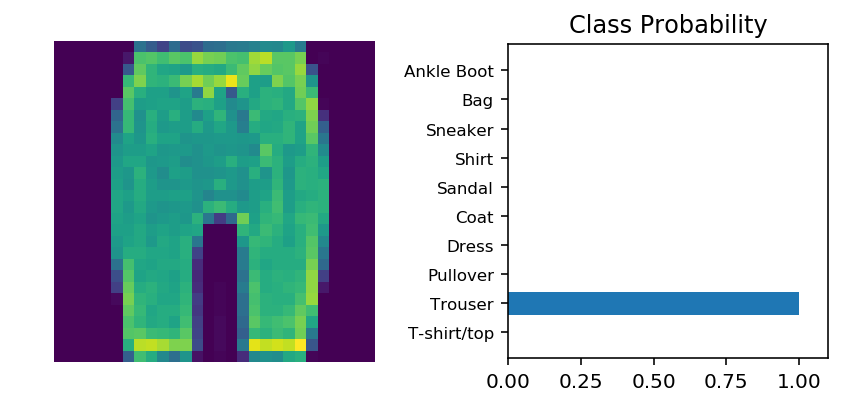

In [22]:
# send pic to model
model.eval()

images,labels = next(iter(train_loader))

# take single img
img = images[0]
# conver to 1D
img = img.view(1,784)

with torch.no_grad():
    output = model.forward(img)

ps = torch.exp(output)
helper.view_classify(img.view(1,28,28),ps,version='Fashion')

In [30]:
# check model
print(model)
print(model.state_dict().keys())
previous_keys = model.state_dict().keys()

Network(
  (layer1): Linear(in_features=784, out_features=512, bias=True)
  (layer2): Linear(in_features=512, out_features=256, bias=True)
  (layer3): Linear(in_features=256, out_features=128, bias=True)
  (layer4): Linear(in_features=128, out_features=64, bias=True)
  (layer5): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.2)
)
odict_keys(['layer1.weight', 'layer1.bias', 'layer2.weight', 'layer2.bias', 'layer3.weight', 'layer3.bias', 'layer4.weight', 'layer4.bias', 'layer5.weight', 'layer5.bias'])


In [26]:
# save path
torch.save(model.state_dict(),"fasionModel.pth")

In [34]:
# laod
state_dict = torch.load("fasionModel.pth")
print(state_dict.keys())

#compare keys
print("Keys are same: " + str(previous_keys ==state_dict.keys()))

odict_keys(['layer1.weight', 'layer1.bias', 'layer2.weight', 'layer2.bias', 'layer3.weight', 'layer3.bias', 'layer4.weight', 'layer4.bias', 'layer5.weight', 'layer5.bias'])
Keys are same: True


In [36]:
# load to model
model.load_state_dict(state_dict)
print(model)

Network(
  (layer1): Linear(in_features=784, out_features=512, bias=True)
  (layer2): Linear(in_features=512, out_features=256, bias=True)
  (layer3): Linear(in_features=256, out_features=128, bias=True)
  (layer4): Linear(in_features=128, out_features=64, bias=True)
  (layer5): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.2)
)


In [40]:
print("thats all")

thats all
